In [47]:
# Twitter Sentiment Analysis using sklearn

### Description:
# - Pogram that colects data from Twitter API and classify it into sentiment categories based on Amazon reviews positive and negative reviews 
### Model Type 
# - Sklearn - GridSearchCV, #Decision Tree Classifier,  
#20/10/2022

### Version - V1.1

### Goals:
# - To build a ML model that is able to predict the sentiment from twitter hashtags, posts and profiles

### Insights and notes:
# - Understand how languages work 
# - I am trying to understand how it is classifying a different language from the training dataset 
# - Can we translate the training dataset?
# - 

### Version Updates:
# - API conections
# - Classify by hashtags
# - Sklearn implemented 
# - Amazon reviews database
# - Save the model 
# - Statistics
# - Added sentiment database
# - Comparsions added 

### Future Implementations: 
# - Plot Analytical charts 
# - Create a list with market symbol and their sentiment
# - Add timeperiod analysis(select period option)
# - Create sentiment dictionaries from web studies 
# - Hyperparameters Optimization 
# - Train and test with the brazilian dataset
# - Test with other ML models 
# - Test with ensemble model
# - Analyse use of prepositions 
# - Create a Market Checker were it indicates de sentiment on the period and Prints the Chart Bullish or Bearsih 

### Author - Luiz Gabriel Bongiolo

### Credits & References 
# - https://developer.twitter.com/en/docs/tutorials/five-ways-to-convert-a-json-object-to-csv
# - https://developer.twitter.com/en/docs/twitter-api/v1/tweets/search/api-reference/get-search-tweets
# - Computer Science youtube channel - https://www.youtube.com/watch?v=ujId4ipkBio&t=280s
# - Keith Galli - https://www.youtube.com/watch?v=M9Itm95JzL0
# - http://jmcauley.ucsd.edu/data/amazon/


In [48]:
#Import Libraries 

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")
import os


In [49]:
#Data Class

import random

class Sentiment:
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"
    POSITIVE = "POSITIVE"

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: #Score of 4 or 5
            return Sentiment.POSITIVE

class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
        
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
        
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        positive_shrunk = positive[:len(negative)]
        self.reviews = negative + positive_shrunk
        random.shuffle(self.reviews)
        
        

In [50]:
import json

file_name = './ML Sentiment Analysis/data/sentiment/Books_small_10000.json'

reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'], review['overall']))
        
reviews[5].text

'I hoped for Mia to have some peace in this book, but her story is so real and raw.  Broken World was so touching and emotional because you go from Mia\'s trauma to her trying to cope.  I love the way the story displays how there is no "just bouncing back" from being sexually assaulted.  Mia showed us how those demons come for you every day and how sometimes they best you. I was so in the moment with Broken World and hurt with Mia because she was surrounded by people but so alone and I understood her feelings.  I found myself wishing I could give her some of my courage and strength or even just to be there for her.  Thank you Lizzy for putting a great character\'s voice on a strong subject and making it so that other peoples story may be heard through Mia\'s.'

In [51]:
#Prepare the data

from sklearn.model_selection import train_test_split

training, test = train_test_split(reviews, test_size=0.33, random_state=42)

train_container = ReviewContainer(training)

test_container = ReviewContainer(test)

In [52]:
train_container.evenly_distribute()
train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_container.evenly_distribute()
test_x = test_container.get_text()
test_y = test_container.get_sentiment()

print(train_y.count(Sentiment.POSITIVE))
print(train_y.count(Sentiment.NEGATIVE))

436
436


In [53]:
#Words vectorization

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# This book is great !
# This book was so bad

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)

test_x_vectors = vectorizer.transform(test_x)

print(train_x[0])
print(train_x_vectors[0].toarray())

I couldn't finish this book.  The writing is so stilted and juvenile that I couldn't look past it.  To bad - the premise sounded good.  What a waste.
[[0. 0. 0. ... 0. 0. 0.]]


In [54]:
#Classification

from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, train_y)

test_x[0]

clf_svm.predict(test_x_vectors[0])

array(['POSITIVE'], dtype='<U8')

In [55]:
#Decision Tree Classifier 

from sklearn.tree import DecisionTreeClassifier

clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)

clf_dec.predict(test_x_vectors[0])

array(['POSITIVE'], dtype='<U8')

In [56]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB

clf_gnb = DecisionTreeClassifier()
clf_gnb.fit(train_x_vectors, train_y)

clf_gnb.predict(test_x_vectors[0])

array(['POSITIVE'], dtype='<U8')

In [57]:
#Losgistic Regression

from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, train_y)

clf_log.predict(test_x_vectors[0])


array(['POSITIVE'], dtype='<U8')

In [58]:
# Mean Accuracy
print(clf_svm.score(test_x_vectors, test_y))
print(clf_dec.score(test_x_vectors, test_y))
print(clf_gnb.score(test_x_vectors, test_y))
print(clf_log.score(test_x_vectors, test_y))

0.8076923076923077
0.6322115384615384
0.6706730769230769
0.8052884615384616


In [59]:
# F1 Scores
from sklearn.metrics import f1_score

f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE])
#f1_score(test_y, clf_log.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])




array([0.80582524, 0.80952381])

In [60]:
test_set = ['very fun', "bad book do not buy", 'horrible waste of time']
new_test = vectorizer.transform(test_set)

clf_svm.predict(new_test)


array(['POSITIVE', 'NEGATIVE', 'NEGATIVE'], dtype='<U8')

In [61]:
#Tuning the model with Grid Search

from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'C': (1,4,8,16,32)}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(train_x_vectors, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')})

In [62]:
print(clf.score(test_x_vectors, test_y))

0.8197115384615384


In [63]:
#Save the model 

import pickle

with open('./ML Sentiment Analysis/models/sentiment_classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [64]:
#Load the model 

with open('./ML Sentiment Analysis/models/sentiment_classifier.pkl', 'rb') as f:
    loaded_clf = pickle.load(f)

In [65]:
print(test_x[0])

loaded_clf.predict(test_x_vectors[0])

Once again another suspenseful story about the Sullivan family. Couldn't put it down. Loved reading this wonderful love story. Can't wait to read the next book in the series.


array(['POSITIVE'], dtype='<U8')

In [66]:
#from sklearn.linear_model import Perceptron

#clf = Perceptron(tol=1e-3, random_state=0)
#clf.fit(X, y)  

In [67]:
#Load the Twitter Key


import os
os.chdir("./Documents/Python Programs /Portfolio/Twitter Sentiment Analysis/")

log = pd.read_csv("ApiKey.csv") #Add your 4 API Keys to this csv file 





In [68]:
#Get the twitter API credentials 

consumerKey = log["Key"][0]
consumerSecret = log["Key"][1]
accessToken = log["Key"][2]
accessTokenSecret = log["Key"][3]

In [69]:
#Create the authentication object 

authenticate = tweepy.OAuth1UserHandler(consumerKey, consumerSecret)

#Set the access token and acces token secret

authenticate.set_access_token(accessToken, accessTokenSecret)

#Create the API object

api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [70]:
# Extract 1000 tweets from hashtags

keywords = "#Bolsonaro"
keywords2 = "#Lula"
limit=1000

posts = tweepy.Cursor(api.search_tweets, q=keywords, count=1000, tweet_mode="extended").items(limit)
posts2 = tweepy.Cursor(api.search_tweets, q=keywords2, count=1000, tweet_mode="extended").items(limit)

#print(tweets)

#Print last 5 tweets

#i = 1
#print("Last 5 tweets: \n")
#for tweet in posts[0:5]:
#    print()

In [71]:
#Create a dataframe with a column called Tweets

df = pd.DataFrame([tweet.full_text for tweet in posts], columns=["Tweets"])

df2 = pd.DataFrame([tweet.full_text for tweet in posts2], columns=["Tweets"])

df2

,Tweets
0,RT @zehdeabreu: Os robôs conseguiram zerar min...
1,RT @zehdeabreu: Os robôs conseguiram zerar min...
2,RT @Zambelli2210: Vamos esperar quanto tempo l...
3,RT @FleuryXavier: #repost @liberdadedireita\n_...
4,RT @PopTopBrasil: Quem tem Ivete fazendo L não...
...,...
995,RT @GiliardAbreu: Vergonha alheia dos Minions ...
996,RT @zehdeabreu: Os robôs conseguiram zerar min...
997,RT @zehdeabreu: Os robôs conseguiram zerar min...
998,RT @felipetommy: URGENTE: A Casa caiu para o L...


In [72]:
#Clean the text 
#Remove prices $ when working with Markets 
#Remove more..

#Create a function to clean the tweets 

def cleanTxt(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) #Removed @mentions 
    text = re.sub(r"#", "", text) #Removing #
    text = re.sub(r"RT[\s]+", "", text) #Removing RT
    text = re.sub(r"https?:\/\/\S+", "", text) #Removing hyperlink

    return text 

df["Tweets"] = df["Tweets"].apply(cleanTxt)

#Clean df2

def cleanTxt(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) #Removed @mentions 
    text = re.sub(r"#", "", text) #Removing #
    text = re.sub(r"RT[\s]+", "", text) #Removing RT
    text = re.sub(r"https?:\/\/\S+", "", text) #Removing hyperlink

    return text 

df2["Tweets"] = df2["Tweets"].apply(cleanTxt)



#Show the cleaned text 
df2

,Tweets
0,: Os robôs conseguiram zerar minha conta. Ajud...
1,: Os robôs conseguiram zerar minha conta. Ajud...
2,: Vamos esperar quanto tempo leva para eles ma...
3,: repost \n__\nCaio Coppolla expoe mentiras de...
4,: Quem tem Ivete fazendo L não precisa de uma ...
...,...
995,: Vergonha alheia dos Minions postando fotos h...
996,: Os robôs conseguiram zerar minha conta. Ajud...
997,: Os robôs conseguiram zerar minha conta. Ajud...
998,": URGENTE: A Casa caiu para o Lula, ele difamo..."


In [73]:
test_set2 = df["Tweets"]
new_test2 = vectorizer.transform(test_set2)

clf_svm.predict(new_test2)



prediction = pd.DataFrame(clf_svm.predict(new_test2), columns=["Prediction"])


df["Prediction"] = prediction

df

,Tweets,Prediction
0,": Compartilhem ao máximo, começou a maior mobi...",NEGATIVE
1,": Compartilhem ao máximo, começou a maior mobi...",NEGATIVE
2,": Meu voto vai para quem: Tem fé em Deus, defe...",POSITIVE
3,: Presidente Jair Bolsonaro hoje no INTELIGÊNC...,NEGATIVE
4,": Meu voto vai para quem: Tem fé em Deus, defe...",POSITIVE
...,...,...
995,": Compartilhem ao máximo, começou a maior mobi...",NEGATIVE
996,": Meu voto vai para quem: Tem fé em Deus, defe...",POSITIVE
997,": Meu voto vai para quem: Tem fé em Deus, defe...",POSITIVE
998,: De qual estado você vai votar em ??\nDataPOV...,POSITIVE


In [74]:
#Train second hashtag

test_set3 = df2["Tweets"]
new_test3 = vectorizer.transform(test_set3)

clf_svm.predict(new_test3)



prediction2 = pd.DataFrame(clf_svm.predict(new_test3), columns=["Prediction2"])


df2["Prediction2"] = prediction2

df2


,Tweets,Prediction2
0,: Os robôs conseguiram zerar minha conta. Ajud...,POSITIVE
1,: Os robôs conseguiram zerar minha conta. Ajud...,POSITIVE
2,: Vamos esperar quanto tempo leva para eles ma...,POSITIVE
3,: repost \n__\nCaio Coppolla expoe mentiras de...,POSITIVE
4,: Quem tem Ivete fazendo L não precisa de uma ...,POSITIVE
...,...,...
995,: Vergonha alheia dos Minions postando fotos h...,NEGATIVE
996,: Os robôs conseguiram zerar minha conta. Ajud...,POSITIVE
997,: Os robôs conseguiram zerar minha conta. Ajud...,POSITIVE
998,": URGENTE: A Casa caiu para o Lula, ele difamo...",NEGATIVE


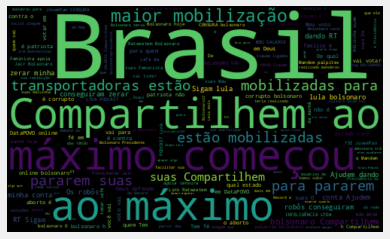

In [85]:
#Check the distribution of the polarity with Word Cloud

allWords = " ".join( [twts for twts in df["Tweets"]])
wordCloud = WordCloud(width =500, height=300, random_state = 42, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")

plt.axis("off")
plt.show()

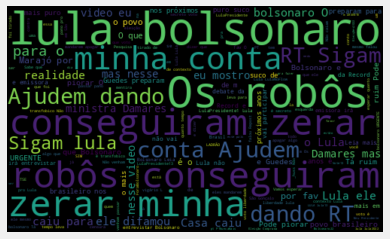

In [86]:
#Check the distribution of the polarity with Word Cloud

allWords2 = " ".join( [twts for twts in df2["Tweets"]])
wordCloud2 = WordCloud(width =500, height=300, random_state = 42, max_font_size = 119).generate(allWords2)

plt.imshow(wordCloud2, interpolation = "bilinear")

plt.axis("off")
plt.show()

In [77]:
#Count values df1

df["Prediction"].value_counts()

NEGATIVE    731
POSITIVE    269
Name: Prediction, dtype: int64

In [78]:
#Describe df1

df["Prediction"].describe()

count         1000
unique           2
top       NEGATIVE
freq           731
Name: Prediction, dtype: object

In [79]:
#Show only positive from df1

df[df["Prediction"]=="POSITIVE"]

,Tweets,Prediction
2,": Meu voto vai para quem: Tem fé em Deus, defe...",POSITIVE
4,": Meu voto vai para quem: Tem fé em Deus, defe...",POSITIVE
8,: Bolsonaro 22,POSITIVE
11,: Quem tem Ivete fazendo L não precisa de uma ...,POSITIVE
16,: De qual estado você vai votar em ??\nDataPOV...,POSITIVE
...,...,...
985,: TSE dá direito de resposta a Lula em 184 ins...,POSITIVE
986,: Os robôs conseguiram zerar minha conta. Ajud...,POSITIVE
996,": Meu voto vai para quem: Tem fé em Deus, defe...",POSITIVE
997,": Meu voto vai para quem: Tem fé em Deus, defe...",POSITIVE


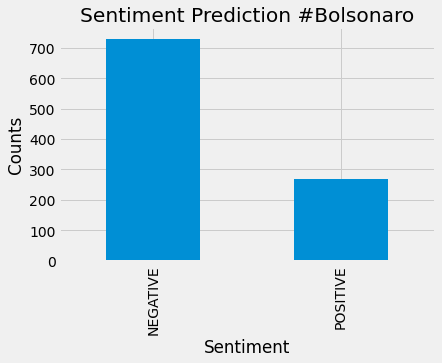

In [80]:
#Plot value counts 

df["Prediction"].value_counts()

#plot

plt.title("Sentiment Prediction " + str(keywords))
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df["Prediction"].value_counts().plot(kind="bar")
plt.show()

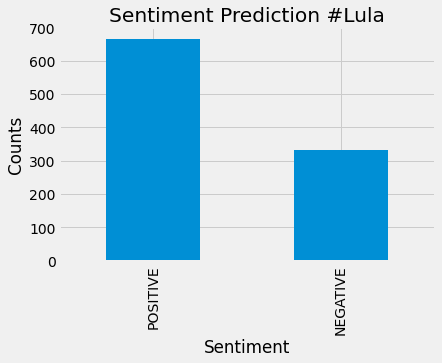

In [81]:
#Plot value counts 

df2["Prediction2"].value_counts()

#plot

plt.title("Sentiment Prediction " + str(keywords2))
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df2["Prediction2"].value_counts().plot(kind="bar")
plt.show()

In [82]:
# Percentage of tweets
# Add number of twiits
# Add period
# Fix round numbers  

ptweets = df[df.Prediction == "POSITIVE"] 
ptweets = ptweets["Tweets"]
ptweets = (len(ptweets) / df.shape[0]) * 100

ntweets = df[df.Prediction == "NEGATIVE"] 
ntweets = ntweets["Tweets"]
ntweets = (len(ntweets) / df.shape[0]) * 100

ptweets2 = df2[df2.Prediction2 == "POSITIVE"] 
ptweets2 = ptweets2["Tweets"]
ptweets2 = (len(ptweets2) / df.shape[0]) * 100

ntweets2 = df2[df2.Prediction2 == "NEGATIVE"] 
ntweets2 = ntweets2["Tweets"]
ntweets2 = (len(ntweets2) / df.shape[0]) * 100



print(str(keywords))
print("Positive " + str(ptweets)+ "%")
print("Negative "+ str(ntweets) + "%")
print("--------------------------------")
print(str(keywords2))
print("Positive " + str(ptweets2)+ "%")
print("Negative "+ str(ntweets2) + "%")
print("--------------------------------")

#Bolsonaro
Positive 26.900000000000002%
Negative 73.1%
--------------------------------
#Lula
Positive 66.7%
Negative 33.300000000000004%
--------------------------------
